# Lab - Disease prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I det här momentet kommer vi jobba med ett dataset med data för hjärt-kärlsjukdom. Börja med att ladda
ned datasetet från Kaggle och läs på vad de olika features betyder. Notera att detta dataset innehåller
många felaktigheter, exempelvis finns negativa blodtryck och blodtryck som är omöjligt höga.

Data description
There are 3 types of input features:

Objective: factual information; \
Examination: results of medical examination; \
Subjective: information given by the patient. \
Features: 

Age | Objective Feature | age | int (days) \
Height | Objective Feature | height | int (cm) | \
Weight | Objective Feature | weight | float (kg) | \
Gender | Objective Feature | gender | categorical code | \
Systolic blood pressure | Examination Feature | ap_hi | int | \
Diastolic blood pressure | Examination Feature | ap_lo | int | \
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | \
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | \
Smoking | Subjective Feature | smoke | binary | \
Alcohol intake | Subjective Feature | alco | binary | \
Physical activity | Subjective Feature | active | binary | \
Presence or absence of cardiovascular disease | Target Variable | cardio | binary | \
All of the dataset values were collected at the moment of medical examination. 

However, there is no information about what the values of the binary variables represent. I will assume that 0 means not present/no and 1 means present/yes.

In [2]:
df_cardio = pd.read_csv("Data/cardio_train.csv", sep=";")
df_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
df_cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_cardio.info() # No missig values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### 2.0 - EDA uppvärmning

Använd pandas, matplotlib och seaborn för att besvara på följande frågor för datasetet:
a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [49]:
cardio_count = df_cardio["cardio"].value_counts().to_frame()

print(f"Number of positive cases for cardiovascular disease: {cardio_count['cardio'].iloc[1]}")
print(f"Number of negative cases for cardiovascular disease: {cardio_count['cardio'].iloc[0]}")

Number of positive cases for cardiovascular disease: 34979
Number of negative cases for cardiovascular disease: 35021


b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

In [29]:
cholesterol_count = df_cardio["cholesterol"].value_counts().to_frame()
cholesterol_count

,cholesterol
1,52385
2,9549
3,8066


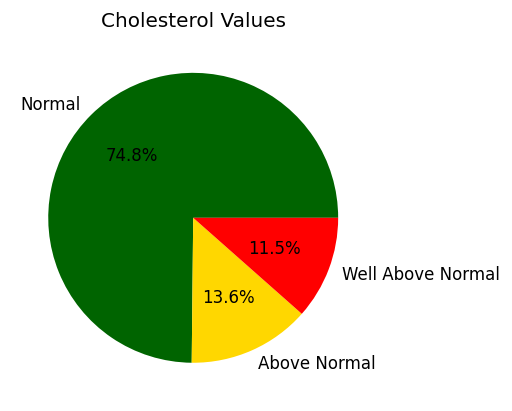

In [77]:
fig, ax = plt.subplots(dpi=120, facecolor="white")
plt.pie(cholesterol_count["cholesterol"], 
            labels=["Normal", "Above Normal", "Well Above Normal"], 
            colors=["darkgreen", "gold", "red"],
            autopct="%1.1f%%")
_ = ax.set_title("Cholesterol Values")

c) Hur ser åldersfördelningen ut? Rita ett histogram.

In [81]:
ages = pd.DataFrame({"Age": df_cardio["age"]/365})
ages

,Age
0,50.391781
1,55.419178
2,51.663014
3,48.282192
4,47.873973
...,...
69995,52.712329
69996,61.920548
69997,52.235616
69998,61.454795


In [100]:
ages.min(), ages.max()

(Age    29.583562
 dtype: float64,
 Age    64.967123
 dtype: float64)

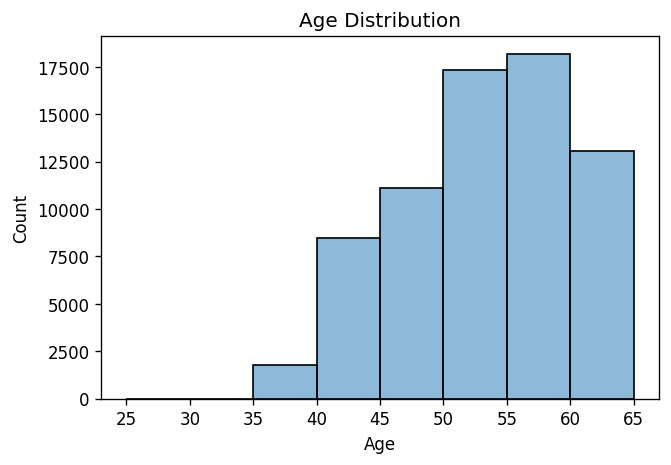

In [104]:
fig = plt.figure(dpi=120)
ax = sns.histplot(ages, bins=range(25, 70, 5), legend=False)
_ = ax.set(title="Age Distribution", xlabel="Age")

d) Hur stor andel röker?

In [133]:
print(f"{df_cardio['smoke'].sum()/len(df_cardio)*100:.1f}% of the participants smoke.")

8.8% of the participants smoke.


e) Hur ser viktfördelningen ut? Rita lämpligt diagram.

In [29]:
df_cardio["weight"].min(), df_cardio["weight"].max()

(10.0, 200.0)

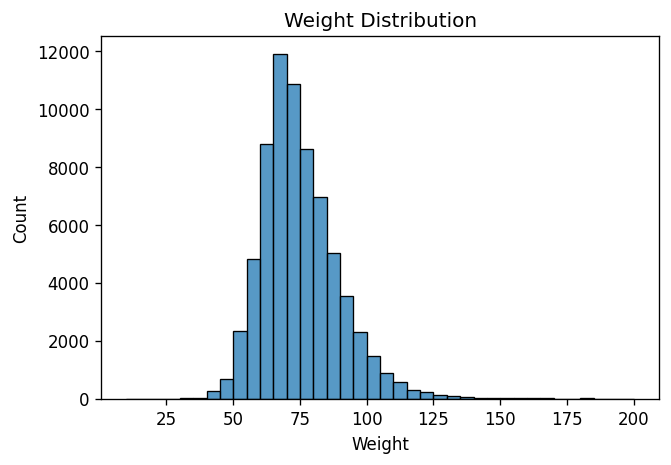

In [28]:
fig = plt.figure(dpi=120)
ax = sns.histplot(df_cardio["weight"], bins=range(10, 205, 5), legend=False)
_ = ax.set(title="Weight Distribution", xlabel="Weight")

f) Hur ser längdfördelningen ut? Rita lämpligt diagram.

In [31]:
df_cardio["height"].min(), df_cardio["height"].max()

(55, 250)

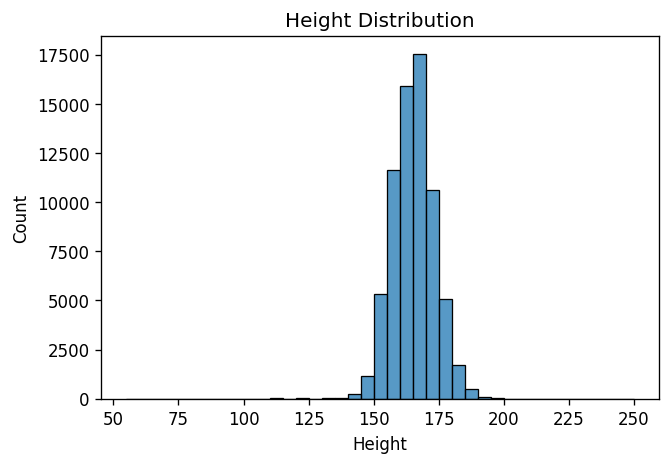

In [34]:
fig = plt.figure(dpi=120)
ax = sns.histplot(df_cardio["height"], bins=range(55, 255, 5))
_ = ax.set(title="Height Distribution", xlabel="Height")

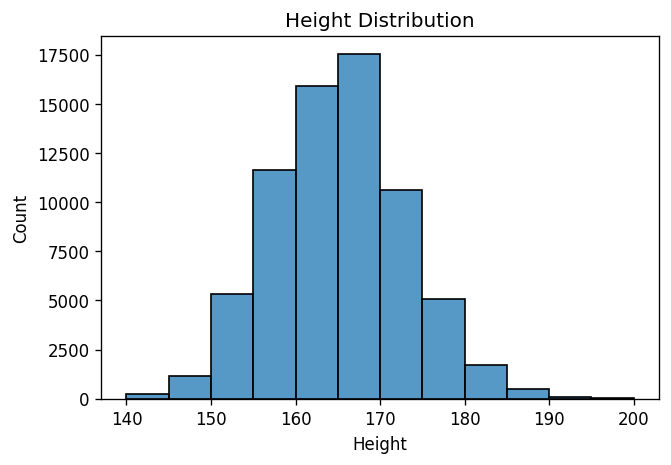

In [38]:
fig = plt.figure(dpi=120)
ax = sns.histplot(df_cardio["height"], bins=range(140, 205, 5))
_ = ax.set(title="Height Distribution", xlabel="Height")

g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

There is no information in the data about which gender is coded as 1 and which is coded as 2. Gender is not balanced.

In [119]:
cardio_gender = pd.DataFrame({"cardio":df_cardio["cardio"].groupby(df_cardio["gender"]).sum(), 
                            "gender":df_cardio["gender"].value_counts()})
cardio_gender["%"] = (cardio_gender["cardio"] / cardio_gender["gender"] * 100).round(2)
cardio_gender

,cardio,gender,%
1,22616,45530,49.67
2,12363,24470,50.52


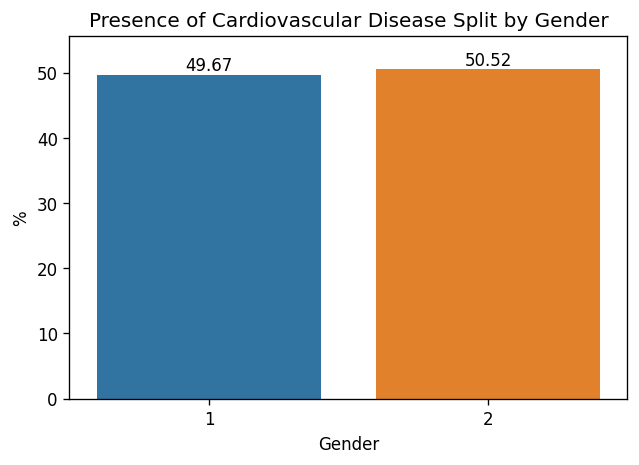

In [125]:
fig = plt.figure(dpi=120)
ax = sns.barplot(data=cardio_gender, x=cardio_gender.index, y="%")
ax.set(xlabel="Gender", title="Presence of Cardiovascular Disease Split by Gender")
ax.bar_label(ax.containers[0])
ax.margins(y=0.1)